# Cargamos las imágenes positivas y negativas

In [6]:
import sys
sys.path.append("code")
from haar import *
import os
from skimage import io
import numpy as np 
%matplotlib inline

base_dir = "../../../student/problemsets-git/data/faces/"
dir_positives = base_dir+"positives"
dir_negatives = base_dir+"negatives"
positive_filenames = os.listdir(dir_positives)
negative_filenames = os.listdir(dir_negatives)

pos_imgs = []
neg_imgs = []

for i in positive_filenames:
    img = io.imread(dir_positives+"/"+i).astype(int)
    pos_imgs.append(img)

for i in negative_filenames:
    img = io.imread(dir_negatives+"/"+i).astype(int)
    neg_imgs.append(img)
    
    
print "loaded", len(pos_imgs), "positive images and", len(neg_imgs), "negative images"

loaded 117 positive images and 94 negative images


# Mostramos cinco imágenes aleatorias de cada clase

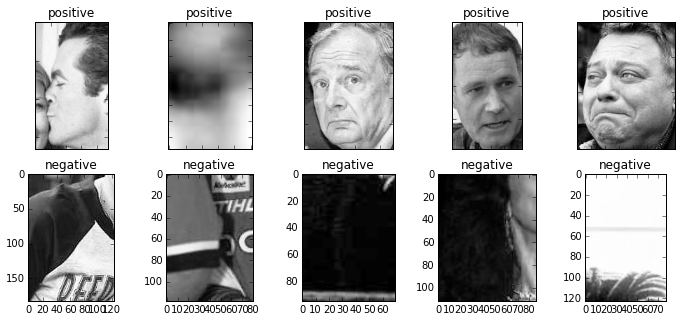

In [7]:
fig = plt.figure(figsize=(12,5))
for j in range(5):
    i = np.random.randint(len(neg_imgs))
    ax=fig.add_subplot(2,5,j+1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.imshow(pos_imgs[i], cmap = plt.cm.Greys_r)    
    plt.title("positive")
    fig.add_subplot(2,5,j+6)
    plt.imshow(neg_imgs[i], cmap = plt.cm.Greys_r)    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title("negative")

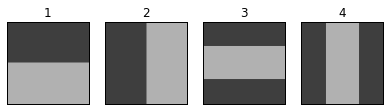

In [8]:
haar_1 = [ {"op": "add", "topleft_row_rel": 0.0, "topleft_col_rel": 0.0, "height_rel": 0.5, "width_rel": 1.0},
           {"op": "sub", "topleft_row_rel": 0.5, "topleft_col_rel": 0.0, "height_rel": 0.5, "width_rel": 1.0}]

haar_2 = [ {"op": "add", "topleft_row_rel": 0.0, "topleft_col_rel": 0.0, "height_rel": 1.0, "width_rel": 0.5},
           {"op": "sub", "topleft_row_rel": 0.0, "topleft_col_rel": 0.5, "height_rel": 1.0, "width_rel": 0.5}]

haar_3 = [ {"op": "add", "topleft_row_rel": 0.0,   "topleft_col_rel": 0.0, "height_rel": 0.3, "width_rel": 1.0},
           {"op": "add", "topleft_row_rel": 0.7,   "topleft_col_rel": 0.0, "height_rel": 0.3, "width_rel": 1.0},
           {"op": "sub", "topleft_row_rel": 0.3,   "topleft_col_rel": 0.0, "height_rel": 0.4, "width_rel": 1.0}]

haar_4 = [ {"op": "add", "topleft_row_rel": 0.0, "topleft_col_rel": 0.0, "height_rel": 1.0, "width_rel": 0.3},
           {"op": "add", "topleft_row_rel": 0.0, "topleft_col_rel": 0.7, "height_rel": 1.0, "width_rel": 0.3},
           {"op": "sub", "topleft_row_rel": 0.0, "topleft_col_rel": 0.3, "height_rel": 1.0, "width_rel": 0.4}]

show_haar_features([haar_1, haar_2, haar_3, haar_4])

### Ejercicio: Construye el dataset para la detección de rostros.

El dataset consta de dos partes:
- los datos: una matriz con una fila por cada imagen y con una columna por cada característica Haar escalada y desplazada. El en caso de usar cuatro características y 6 escalas y desplazamientos, el número total de características ha de ser 400.
- las etiquetas: un vector con un elemento por cada imagen indicando con `1` que es un ejemplo positivo (contiene un rostro) y `2` que es un ejemplo negativo (no contiene un rostro)

completa la función `make_haar_dataset_for_faces` para que devuelva 
- una matriz Numpy $\in \mathbb{R}^{m \times n}$ con $m$ filas (una por imagen) y $n$ columnas (una por cada característica Haar) con los datos
- un vector Numpy $\in \{0,1\}^m$ con las etiquetas

In [9]:
haar_features = [ haar_1, haar_2, haar_3, haar_4 ]
def make_haar_dataset_for_faces(haar_features, positive_images, negative_images, N):
    datos     = []
    etiquetas = []
    # -- TU CODIGO AQUI
    d=positive_images+negative_images    
    datos=np.zeros((len(positive_images)+len(negative_images),400))
    etiquetas=np.ones(len(positive_images)+len(negative_images))
    etiquetas[len(positive_images):len(positive_images)+len(negative_images)]=2
    for i in range(len(positive_images)+len(negative_images)):
      
        Mi = get_integral(d[i])
        datos[i]=get_haar_features(haar_features, d[i], Mi, nb_scales=N, nb_shifts=N)
     
    
    
    return datos, etiquetas
        
d,c = make_haar_dataset_for_faces(haar_features, pos_imgs, neg_imgs, 6)
print d.shape, c.shape

(211, 400) (211,)


In [10]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

est = RandomForestClassifier(n_estimators=50)#machine learning
sc = cross_val_score(est, d, c, cv=10)#repite el proceso y arroja estadisticas
print np.mean(sc), np.std(sc)

0.800822510823 0.0922816808603
